In [54]:
import pandas as pd

In [55]:
kakao = pd.read_csv("../../data/K_naver_comments_monthlyTop4000.csv")

In [56]:
kakao

,Unnamed: 0,url,text,reply_count,uid,uname,like,dislike,c_time,cid,pid,sid
0,0,https://n.news.naver.com/mnews/article/comment...,대한민국의 차량들이 너무 많다 정말 1가구당 차량수 1대로 제한해야한다 \n이대론 ...,0.0,2aqSG,jung****,0.0,2.0,2022-02-01T09:45:57+0900,748388986631749886,748388986631749886,101
1,1,https://n.news.naver.com/mnews/article/comment...,지들 잇속만 챙길라고 자사 주식 팔아치우는 카카오 경영진 새끼들은 입 다물어라......,0.0,xScD,mizn****,1.0,0.0,2022-01-31T18:35:36+0900,748330336135413976,748330336135413976,101
2,2,https://n.news.naver.com/mnews/article/comment...,카카오는 상도없는 장사꾼 이다 사회적 특혜를 준 현 정부는 그 댓가를 받고 국민의 ...,0.0,5KpGf,runj****,2.0,0.0,2022-01-31T15:28:38+0900,748318291084181771,748318291084181771,101
3,3,https://n.news.naver.com/mnews/article/comment...,페이 ceo가 싹 처분하고 날랐다던 카카오?,0.0,1yf7P,city****,0.0,0.0,2022-01-31T13:47:59+0900,748311807143182710,748311807143182710,101
4,4,https://n.news.naver.com/mnews/article/comment...,먹튀 지대로 하겟네,0.0,64081,kayk****,0.0,0.0,2022-01-31T12:54:30+0900,748308362663297206,748308362663297206,101
...,...,...,...,...,...,...,...,...,...,...,...,...
212917,212917,https://n.news.naver.com/mnews/article/comment...,말로만 떠들어대네 ㅋㅋ 진짜 말이야 방구야,0.0,1jgyE,sho2****,0.0,0.0,2022-12-20T09:10:00+0900,778259026487017477,778259026487017477,105
212918,212918,https://n.news.naver.com/mnews/article/comment...,ㅋㅋㅋㅋㅋㅋㅋ 뭔소리나,0.0,2LH5k,semo****,0.0,0.0,2022-12-20T07:08:37+0900,778251207113179288,778251207113179288,105
212919,212919,https://n.news.naver.com/mnews/article/comment...,후회와 책망하지말고 명확한 해결책을 내고 한두번 있었던 일 아닌거 다 아니깐 기사로...,0.0,7uHcQ,kky0****,0.0,0.0,2022-12-20T09:29:28+0900,778260281355665639,778260281355665639,105
212920,212920,https://n.news.naver.com/mnews/article/comment...,말로만 떠들어대네 ㅋㅋ 진짜 말이야 방구야,0.0,1jgyE,sho2****,0.0,0.0,2022-12-20T09:10:00+0900,778259026487017477,778259026487017477,105


In [57]:
import pandas as pd

import sys
sys.path.append("/home/mglee/VSCODE/git_folder/KakaoPay_ESG/code")

import comments_sentiment as senti

2023-03-02 11:04:22.131626: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


device : cuda:0
using cached model. /home/mglee/VSCODE/git_folder/KakaoPay_ESG/code/news/.cache/kobert_v1.zip
using cached model. /home/mglee/VSCODE/git_folder/KakaoPay_ESG/code/news/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece
using cached model. /home/mglee/VSCODE/git_folder/KakaoPay_ESG/code/news/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece


In [58]:
kakao['senti'] = senti.main(kakao['text'])

BERT dataset creating......
BERT Classifier Start......


100%|██████████| 1664/1664 [01:55<00:00, 14.44it/s]


Predicting......


In [61]:
kakao['ymd'] = kakao['c_time'].apply(lambda x : x[:-14])

In [62]:
kakao.to_csv("../../data/K_comments_senti0302.csv")

In [63]:
news_comments_senti_ts = kakao.groupby('ymd').sum('senti')

In [64]:
news_comments_count_ts = kakao.groupby('ymd').size()

In [65]:
news_comments_senti_ts = pd.DataFrame(news_comments_senti_ts['senti'] / news_comments_count_ts)

In [66]:
news_comments_senti_ts.to_csv("../../data/time series/kakao_senti_ts0302.csv")

In [67]:
news_comments_count_ts.to_csv("../../data/time series/kakao_count_ts0302.csv")

TS

여기부터 시작

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [69]:

news_comments_count_ts = pd.read_csv("../../data/time series/kakao_count_ts0302.csv", index_col=0)
news_comments_senti_ts = pd.read_csv("../../data/time series/kakao_senti_ts0302.csv", index_col=0)

In [70]:
event = pd.read_excel("../../data/time series/카카오페이 ESG 활동 기사 배포 시점.xlsx")

In [71]:
event = event[['Unnamed: 1', 'Unnamed: 2']]
event = event.dropna()
event.columns = ['event', 'date']

"# of comments" visualization

In [72]:
news_comments_count = pd.DataFrame(news_comments_count_ts).reset_index()

In [73]:
news_comments_count

,ymd,0
0,2022-01-02,33
1,2022-01-03,57
2,2022-01-04,199
3,2022-01-05,203
4,2022-01-06,949
...,...,...
375,2023-02-01,2
376,2023-02-10,1
377,2023-02-16,1
378,2023-02-18,1


In [74]:
news_comments_count['lag1'] = news_comments_count['0'] - news_comments_count['0'].shift(periods=1)

In [75]:
news_c_c_2022 = news_comments_count[news_comments_count['ymd'].apply(lambda x : '2022' in x)]

In [76]:
md = news_c_c_2022['ymd'].apply(lambda x : x[5:])

In [77]:
tmd = news_comments_count['ymd'].apply(lambda x : x[5:])

In [78]:
news_c_c_2022.reset_index(drop = True, inplace= True)

In [79]:
md.reset_index(drop=True, inplace=True)

In [80]:
event.dropna()

,event,date
1,ESG 추진위원회,2022-05-24
2,QR 재활용,2022-07-05
3,TCFD 지지선언,2022-11-26
4,UNGC 가입,2022-10-14
5,같이가치와 연말기부캠페인,2022-12-02
6,계좌지킴이서비스,2022-11-14
7,금융사기 및 송금피해 예방,2022-09-07
8,금융취약계층 응대 매뉴얼,2022-09-21
9,동네무료보험 서비스,2022-08-29
10,상생기금 10억 조성,2022-09-27


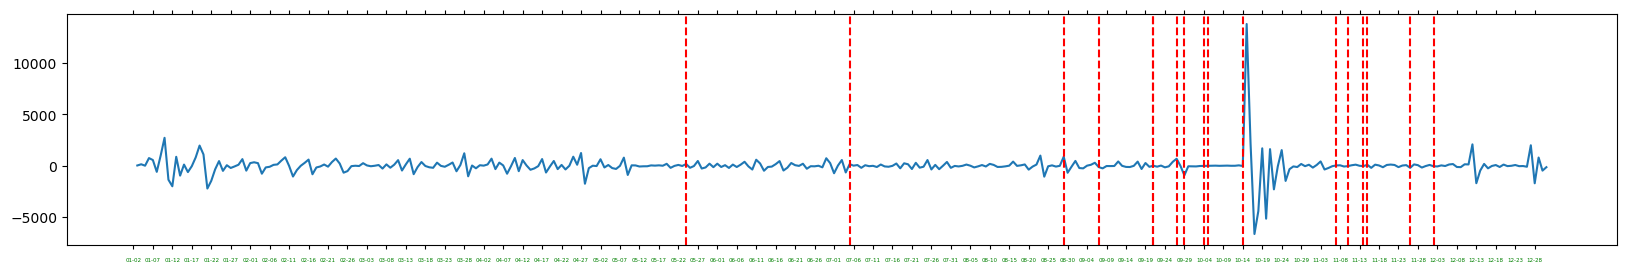

In [81]:
step_size = 5

xticks = np.arange(0, len(news_c_c_2022['ymd']), step_size)

plt.figure(figsize=(20,3))
plt.plot(news_c_c_2022['lag1'])
plt.xticks(xticks, labels = md[xticks])
plt.tick_params(axis='x', length=3, pad=6, labelsize=4, labelcolor='green', top=True)

for _, row in event.iterrows():
    line_idx = news_c_c_2022[news_c_c_2022['ymd'] == str(row['date'])[:-9]].index
    plt.axvline(line_idx, color = 'r', linestyle = '--')

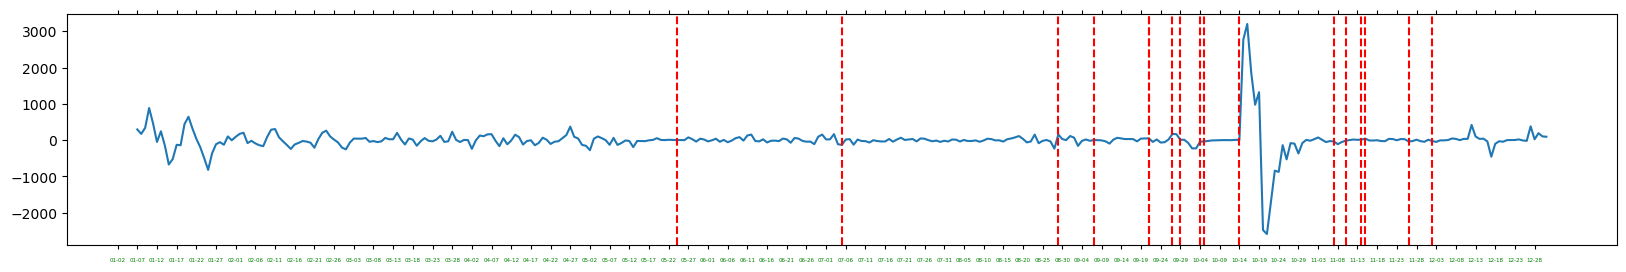

In [27]:
step_size = 5

xticks = np.arange(0, len(news_c_c_2022['ymd']), step_size)

plt.figure(figsize=(20,3))
plt.plot(pd.Series.rolling(news_c_c_2022['lag1'], window = 5, center=False).mean())
plt.xticks(xticks, labels = md[xticks])
plt.tick_params(axis='x', length=3, pad=6, labelsize=4, labelcolor='green', top=True)

for _, row in event.iterrows():
    line_idx = news_c_c_2022[news_c_c_2022['ymd'] == str(row['date'])[:-9]].index
    plt.axvline(line_idx, color = 'r', linestyle = '--')
    
plt.savefig("../../result/fig/Kakao_c_count_lag1_w5.png", dpi = 1000)

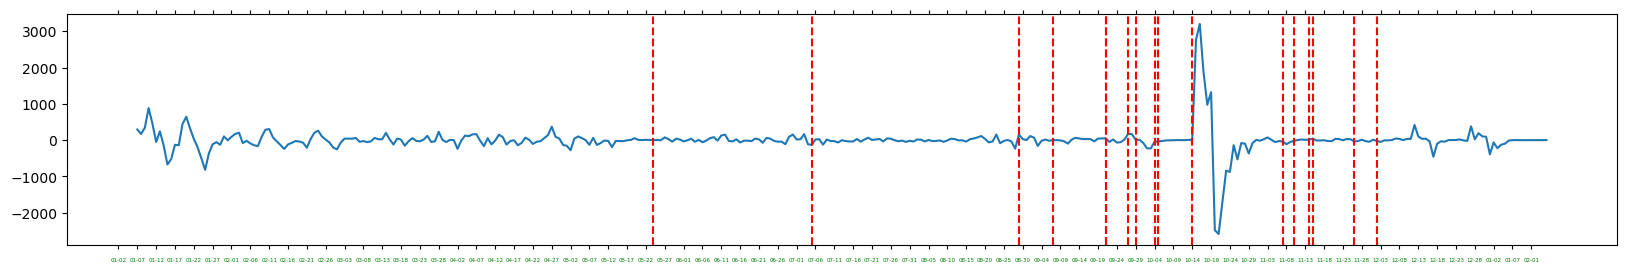

In [52]:
step_size = 5

xticks = np.arange(0, len(news_comments_count['ymd']), step_size)

plt.figure(figsize=(20,3))
plt.plot(pd.Series.rolling(news_comments_count['lag1'], window = 5, center=False).mean())
plt.xticks(xticks, labels = tmd[xticks])
plt.tick_params(axis='x', length=3, pad=6, labelsize=4, labelcolor='green', top=True)

for _, row in event.iterrows():
    line_idx = news_comments_count[news_comments_count['ymd'] == str(row['date'])[:-9]].index
    plt.axvline(line_idx, color = 'r', linestyle = '--')
    
#plt.savefig("../../result/fig/KP_tc_count_lag1_w5.png", dpi = 1000)

"mean of sentiment" visualization

In [82]:
news_comments_senti = pd.DataFrame(news_comments_senti_ts).reset_index()

In [83]:
news_comments_senti['0'] = news_comments_senti['0'].replace(0, 0.1)
news_comments_senti['0'] = news_comments_senti['0'] * 100

In [84]:
news_comments_senti['lag1'] = (news_comments_senti['0'] - news_comments_senti['0'].shift(periods=1)) /  news_comments_senti['0']
#news_comments_senti['lag1'] = news_comments_senti['0']- news_comments_senti['0'].shift(periods=1)

In [85]:
news_c_s_2022 = news_comments_senti[news_comments_senti['ymd'].apply(lambda x : '2022' in x)]

In [86]:
news_c_s_2022

,ymd,0,lag1
0,2022-01-02,6.060606,NaN
1,2022-01-03,7.017544,0.136364
2,2022-01-04,2.010050,-2.491228
3,2022-01-05,2.463054,0.183920
4,2022-01-06,4.952582,0.502673
...,...,...,...
359,2022-12-27,5.174963,-0.932381
360,2022-12-28,5.678233,0.088632
361,2022-12-29,4.655327,-0.219728
362,2022-12-30,5.148206,0.095738


In [87]:
mds = news_c_s_2022['ymd'].apply(lambda x : x[5:])

In [88]:
news_c_s_2022.reset_index(drop = True, inplace= True)
mds.reset_index(drop=True, inplace=True)

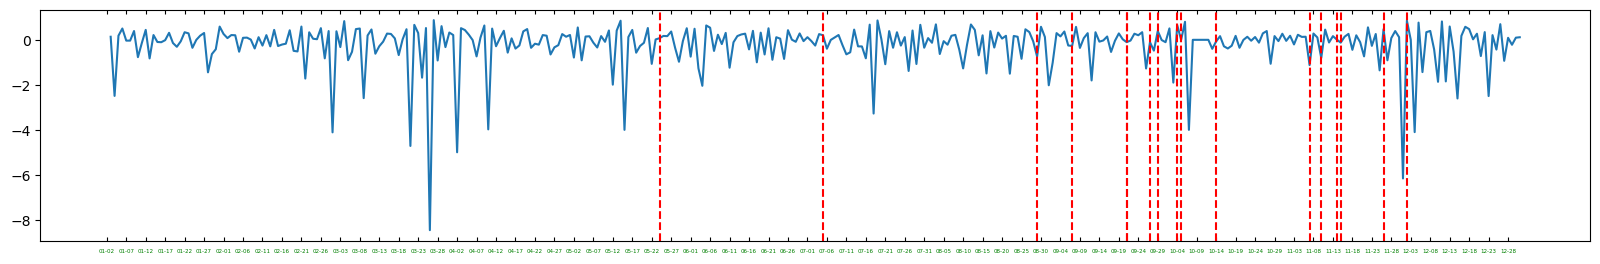

In [89]:
step_size = 5

xticks = np.arange(0, len(news_c_s_2022['ymd']), step_size)

plt.figure(figsize=(20,3))
plt.plot(news_c_s_2022['lag1'])
plt.xticks(xticks, labels = mds[xticks])
plt.tick_params(axis='x', direction='in', length=3, pad=6, labelsize=4, labelcolor='green', top=True)


for _, row in event.iterrows():
    line_idx = news_c_c_2022[news_c_c_2022['ymd'] == str(row['date'])[:-9]].index
    plt.axvline(line_idx, color = 'r', linestyle = '--')
    
plt.savefig("../../result/fig/Kakao_c_senti_lag1.png", dpi = 1000)

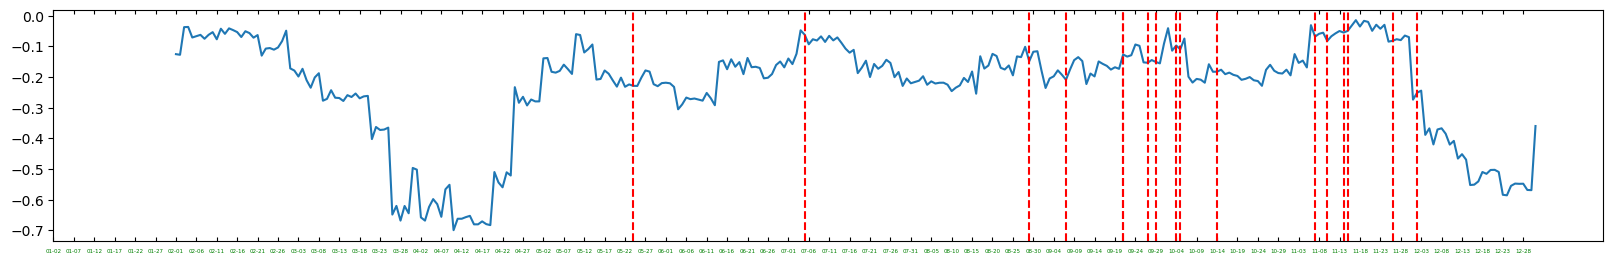

In [90]:
step_size = 5

xticks = np.arange(0, len(news_c_s_2022['ymd']), step_size)

plt.figure(figsize=(20,3))
plt.plot(pd.Series.rolling(news_c_s_2022['lag1'], window = 30, center=False).mean())
plt.xticks(xticks, labels = mds[xticks])
plt.tick_params(axis='x', direction='in', length=3, pad=6, labelsize=4, labelcolor='green', top=True)


for _, row in event.iterrows():
    line_idx = news_c_c_2022[news_c_c_2022['ymd'] == str(row['date'])[:-9]].index
    plt.axvline(line_idx, color = 'r', linestyle = '--')
    
plt.savefig("../../result/fig/Kakao_c_senti_lag1_w5.png", dpi = 1000)

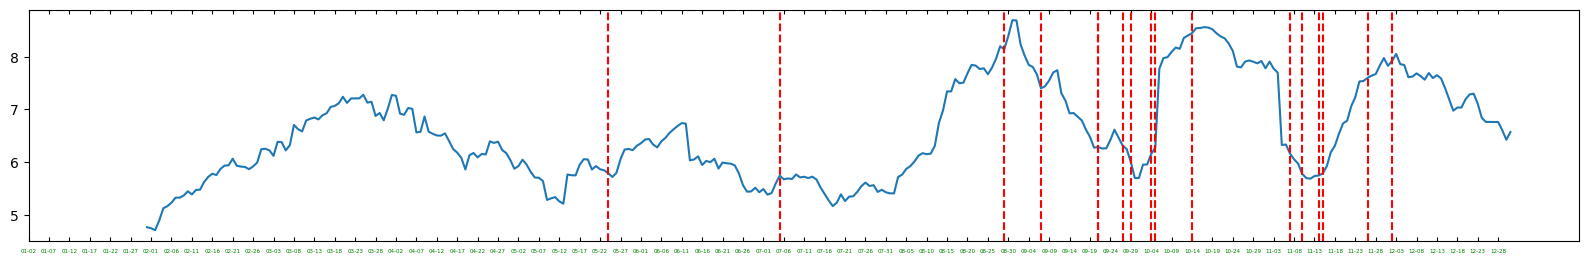

In [91]:
step_size = 5

xticks = np.arange(0, len(news_c_s_2022['ymd']), step_size)

plt.figure(figsize=(20,3))
plt.plot(pd.Series.rolling(news_c_s_2022['0'], window = 30, center=False).mean())
plt.xticks(xticks, labels = mds[xticks])
plt.tick_params(axis='x', direction='in', length=3, pad=6, labelsize=4, labelcolor='green', top=True)


for _, row in event.iterrows():
    line_idx = news_c_c_2022[news_c_c_2022['ymd'] == str(row['date'])[:-9]].index
    plt.axvline(line_idx, color = 'r', linestyle = '--')
